# SF Salaries Analysis
* Data Overview
* Data clean & analysis
* Conclusion

## Data Overview
This dataset is about San Francisco‘s empolyee salaries data provided by Kaggle

### Import data & necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Salaries.csv')

/Users/bohan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Get general information about data

In [2]:
df.shape

(148654, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [5]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


#### From the general information, we can see that TotalPayBenefits and TotalPay min value is negative, it is bad data, and other columns like BasePay, OvertimePay and OtherPay, Benefits should make data type convertion in order to further analysis

Also, accoring to the above information, the data types of columns can be divided into two parts:
* Numerical:
 * BasePay
 * OvertimePay
 * OtherPay
 * Benefits
 * TotalPay
 * TotalPayBenefits
 * Year
 
* Categorical:
 * EmployeeName
 * JobTitle
 * Notes
 * Agency
 * Status

## Data cleaning & Data analysis

#### First, delete some unrelated data for further analysis Then analysis different columns one by one

### Column: Notes & Agency

In [6]:
df.Notes.unique()

array([ nan])

In [7]:
df.Agency.unique()

array(['San Francisco'], dtype=object)

#### These two clumns: Notes and Agency are not useful for analysis, so we delete them 

In [8]:
del(df['Notes'])

In [9]:
del(df['Agency'])

### Column: Year

In [10]:
df.Year.unique()

array([2011, 2012, 2013, 2014])

#### All data are collected from four years, so we may analysis the data based on each year

### Column: Status

In [11]:
df.Status.unique()

array([nan, 'PT', 'FT'], dtype=object)

#### It seems that some year's data is not marked the job type, so we dig further

In [12]:
df.loc[df['Status']=='PT'].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
110531,110532,David Shinn,Deputy Chief 3,129150,0,342803,38780,471952.64,510732.68,2014,PT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.7,339653.70,436224.36,2014,PT
110543,110544,Richard L Corriea,Commander 3,184734,0,137409,51940.4,322143.10,374083.49,2014,PT
110579,110580,Sarah E Cary,Anesthetist,223381,8899.74,20532.9,69382.3,252813.85,322196.12,2014,PT
110591,110592,Robert Velarde,Inspector 3,119408,12378.4,145796,36436.4,277581.77,314018.17,2014,PT


In [13]:
df.loc[df['Status']=='PT'].tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,PT
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,PT
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,PT


In [14]:
df.loc[df['Year']==2014].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
110531,110532,David Shinn,Deputy Chief 3,129150,0,342803,38780,471952.64,510732.68,2014,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835,10713,60563.5,89540.2,390111.98,479652.21,2014,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.7,339653.70,436224.36,2014,PT
110534,110535,Gregory P Suhr,Chief of Police,307450,0,19266.7,91302.5,326716.76,418019.22,2014,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068,0,24165.4,91201.7,326233.44,417435.10,2014,FT


#### It is clear that only data in 2014 is linked with job status, so we analysis these data based on different job types

### Column: Id

In [15]:
df.Id.unique()

array([     1,      2,      3, ..., 148652, 148653, 148654])

In [16]:
len(df.Id.unique())

148654

#### Every employee has unique ID, and listed ascending

### Column: JobTitle

In [17]:
df_num=df.groupby('JobTitle').count()
temp=df_num.loc[:,['Id']]
jobTitle=temp.sort_values(by='Id')

In [18]:
jobTitle.head()

,Id
JobTitle,
ZOO CURATOR,1
"DIRECTOR, INFORMATION TECHNOLOGY GROUP",1
"DIRECTOR, HUMAN RESOURCES",1
"DIRECTOR, FISCAL SERVICES",1
"DIRECTOR, EMPLOYEE RELATIONS DIVISION",1


In [19]:
jobTitle.tail()

,Id
JobTitle,
Police Officer 3,2421
Public Svc Aide-Public Works,2518
Registered Nurse,3736
Special Nurse,4389
Transit Operator,7036


In [20]:
len(df['JobTitle'].unique())

2159

In [21]:
ft_2014 = df[df['Status'] == 'FT']
pt_2014 = df[df['Status'] == 'PT']

In [22]:
len(ft_2014['JobTitle'].unique())

916

In [23]:
len(pt_2014['JobTitle'].unique())

712

#### It is clear that in general, police officers and public worker occupy most in the dataSet, and there lists 2155 different jobs. In 2014, the number of full-time job and part -time job is 916 and 711 respectively. 

### Clean TotalPayBenefits & TotalPay:

In [24]:
df = df.loc[df['TotalPayBenefits']>0]

In [25]:
df = df.loc[df['TotalPay']>0]

### Convert type and clean in BasePay & OvertimePay & OtherPay & Benefits:

In [26]:
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])
df['Benefits'] = pd.to_numeric(df['Benefits'])

In [27]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148285.000000,147968.000000,148285.000000,148285.000000,112129.000000,148285.000000,148285.000000,148285.000000
mean,74239.440483,66359.963462,5078.529872,3657.752819,25066.751051,74954.383468,93909.164657,2012.521307
std,42919.609576,42748.980506,11465.707967,8064.472792,15391.472880,50441.766219,62720.972790,1.118338
min,1.000000,-166.010000,-0.010000,-7058.590000,-13.800000,0.300000,0.300000,2011.000000
25%,37075.000000,33699.580000,0.000000,0.000000,11915.280000,36679.200000,44692.040000,2012.000000
50%,74171.000000,65030.645000,0.000000,819.540000,28670.970000,71553.000000,92572.300000,2013.000000
75%,111530.000000,94694.502500,4680.210000,4254.900000,35590.730000,105967.060000,133004.190000,2014.000000
max,148626.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


#### Some time these columns may contain value: nan, so we first fill nan with 0, and filter the negative values

In [28]:
df['BasePay'] = df['BasePay'].fillna(0)

In [29]:
df = df.loc[df['BasePay']>=0]

In [30]:
df['OvertimePay'] = df['OvertimePay'].fillna(0)

In [31]:
df = df.loc[df['OvertimePay']>=0]

In [32]:
df['OtherPay'] = df['OtherPay'].fillna(0)

In [33]:
df = df.loc[df['OtherPay']>=0]

In [34]:
 df['Benefits'] = df['Benefits'].fillna(0)

In [35]:
df = df.loc[df['Benefits']>=0]

In [36]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148268.000000,148268.000000,148268.000000,148268.000000,148268.000000,148268.000000,148268.000000,148268.000000
mean,74238.388216,66223.610742,5079.087044,3658.142756,18956.167764,74960.840542,93917.008306,2012.521320
std,42921.503310,42811.027791,11466.245889,8064.789777,17175.158902,50439.895944,62718.498879,1.118383
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.300000,2011.000000
25%,37070.750000,33297.975000,0.000000,0.000000,0.000000,36694.337500,44718.145000,2012.000000
50%,74173.500000,64957.530000,0.000000,819.595000,23376.775000,71557.105000,92577.830000,2013.000000
75%,111533.250000,94691.010000,4681.040000,4255.390000,33493.195000,105967.107500,133009.477500,2014.000000
max,148626.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


#### Now as seen from  the general information, it seems there has no bad data.  We analysis these pay and benefits information one by one:

### Column: TotalPayBenefits:
#### TotalPayBenefits indicates the total income of each employee, so we start with it

In [37]:
df['TotalPayBenefits'].describe()

count    148268.000000
mean      93917.008306
std       62718.498879
min           0.300000
25%       44718.145000
50%       92577.830000
75%      133009.477500
max      567595.430000
Name: TotalPayBenefits, dtype: float64

#### As seen, the max value is nearly ten times of min value, so we plot them based on each year to get a better view

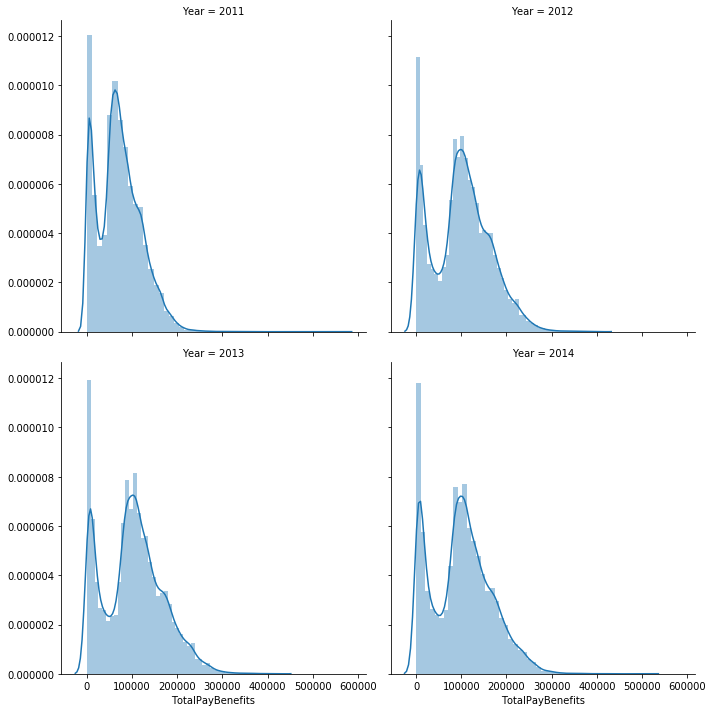

In [38]:
bGrapf = sns.FacetGrid(df, col="Year", col_wrap=2, size=5, dropna=True)
bGrapf.map(sns.distplot, 'TotalPayBenefits',kde=True);

#### It is clear that the general graphic shape in these four years are quite similar. And they all have a vally. We check it later, it may be related with other factor

### Column: TotalPay:

In [39]:
df['TotalPay'].describe()

count    148268.000000
mean      74960.840542
std       50439.895944
min           0.300000
25%       36694.337500
50%       71557.105000
75%      105967.107500
max      567595.430000
Name: TotalPay, dtype: float64

#### Similar situation with TotalPayBenefits, so plot next:

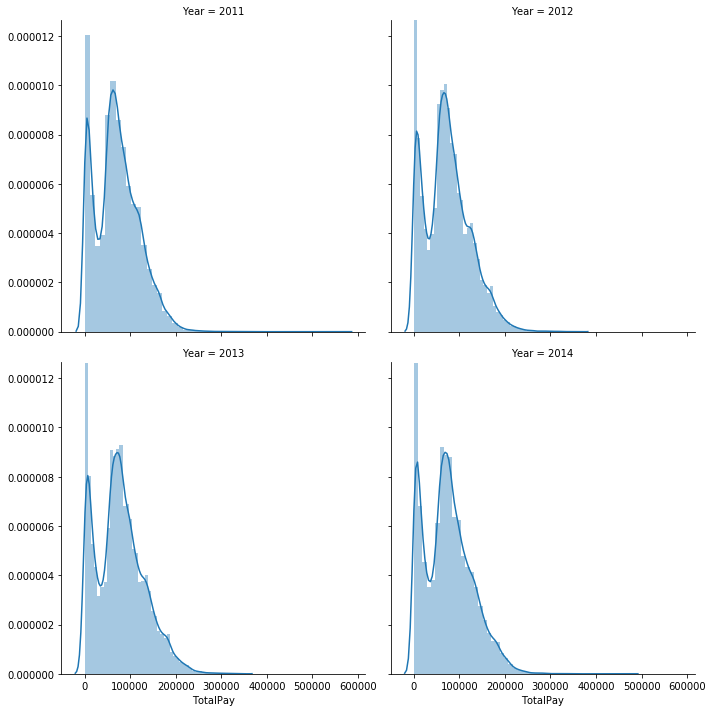

In [40]:
bGrapf = sns.FacetGrid(df, col="Year", col_wrap=2, size=5, dropna=True)
bGrapf.map(sns.distplot, 'TotalPay',kde=True);

#### Also exits a vally, so check other columns

### Column: BasePay

In [41]:
df['BasePay'].describe()

count    148268.000000
mean      66223.610742
std       42811.027791
min           0.000000
25%       33297.975000
50%       64957.530000
75%       94691.010000
max      319275.010000
Name: BasePay, dtype: float64

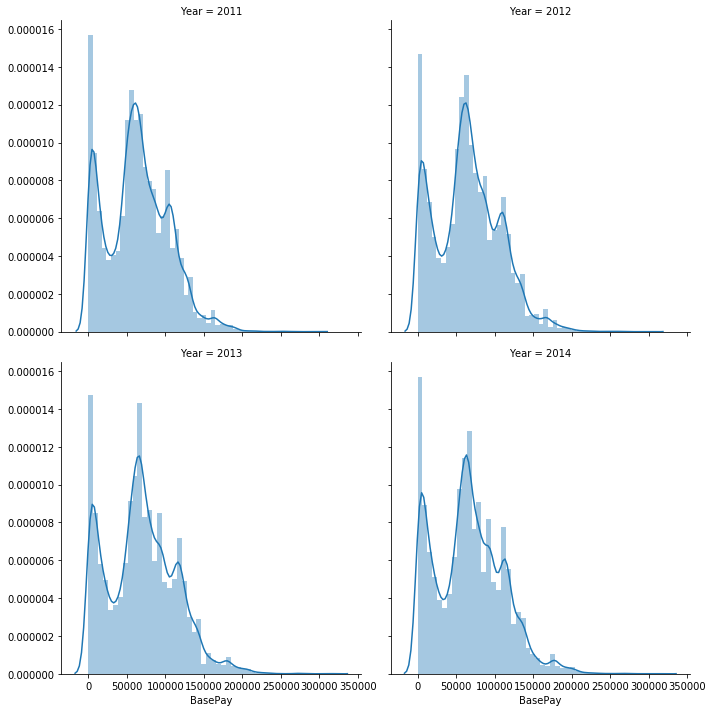

In [42]:
bGrapf = sns.FacetGrid(df, col="Year", col_wrap=2, size=5, dropna=True)
bGrapf.map(sns.distplot, 'BasePay',kde=True);

#### Also same distribution situation

### Column: OvertimePay

In [43]:
df['OvertimePay'].describe()

count    148268.000000
mean       5079.087044
std       11466.245889
min           0.000000
25%           0.000000
50%           0.000000
75%        4681.040000
max      245131.880000
Name: OvertimePay, dtype: float64

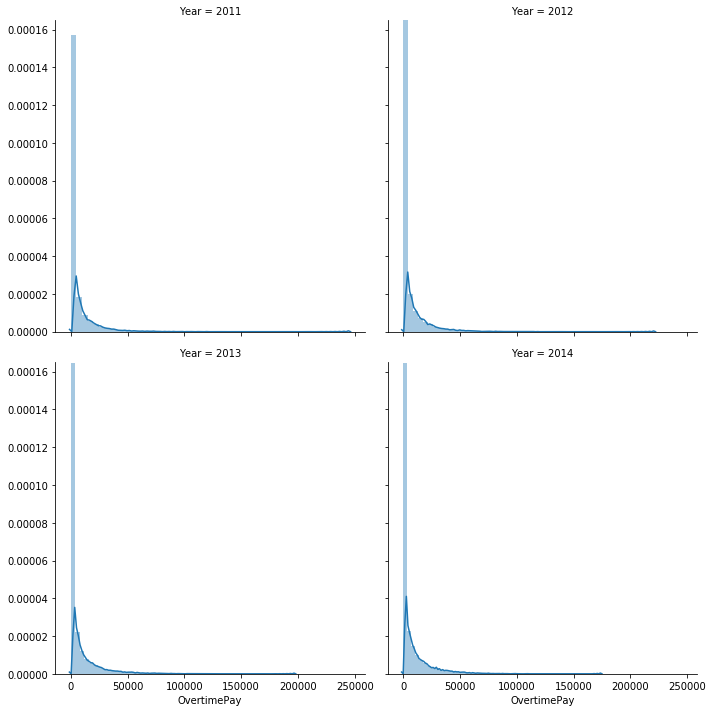

In [44]:
bGrapf = sns.FacetGrid(df, col="Year", col_wrap=2, size=5, dropna=True)
bGrapf.map(sns.distplot, 'OvertimePay',kde=True);

#### Most people attend less overtime work and get less pay. But there actually exists few people get extrame much more overtime pay

### Column: OtherPay

In [45]:
df['OtherPay'].describe()

count    148268.000000
mean       3658.142756
std        8064.789777
min           0.000000
25%           0.000000
50%         819.595000
75%        4255.390000
max      400184.250000
Name: OtherPay, dtype: float64

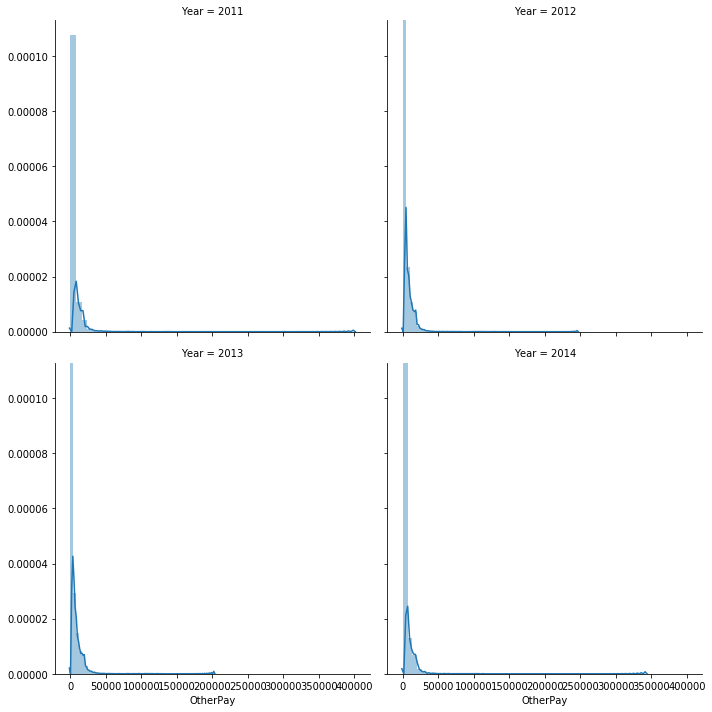

In [46]:
bGrapf = sns.FacetGrid(df, col="Year", col_wrap=2, size=5, dropna=True)
bGrapf.map(sns.distplot, 'OtherPay',kde=True);

#### Quite similar with OvertimePay situation, most people get less, and few people get much more

### Column: Benefits

In [47]:
df['Benefits'].describe()

count    148268.000000
mean      18956.167764
std       17175.158902
min           0.000000
25%           0.000000
50%       23376.775000
75%       33493.195000
max       96570.660000
Name: Benefits, dtype: float64

/Users/bohan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bohan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


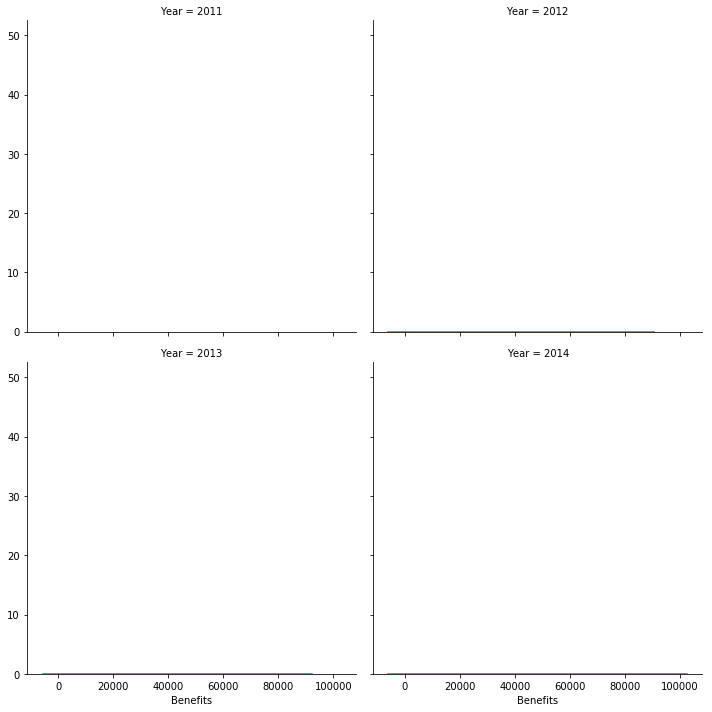

In [48]:
bGrapf = sns.FacetGrid(df, col="Year", col_wrap=2, size=5,dropna=True)
bGrapf.map(sns.distplot, 'Benefits',kde=True);

#### There may exists some data influence the plot work, so we dig further

In [49]:
df.loc[(df['Year']==2011) & (df['Benefits']!=0)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status


#### The data in 2011 has not been linked with Benefits information, so we neglect the data in 2011, and analysis other three years

In [50]:
df_B = df.loc[df['Year']>2011]

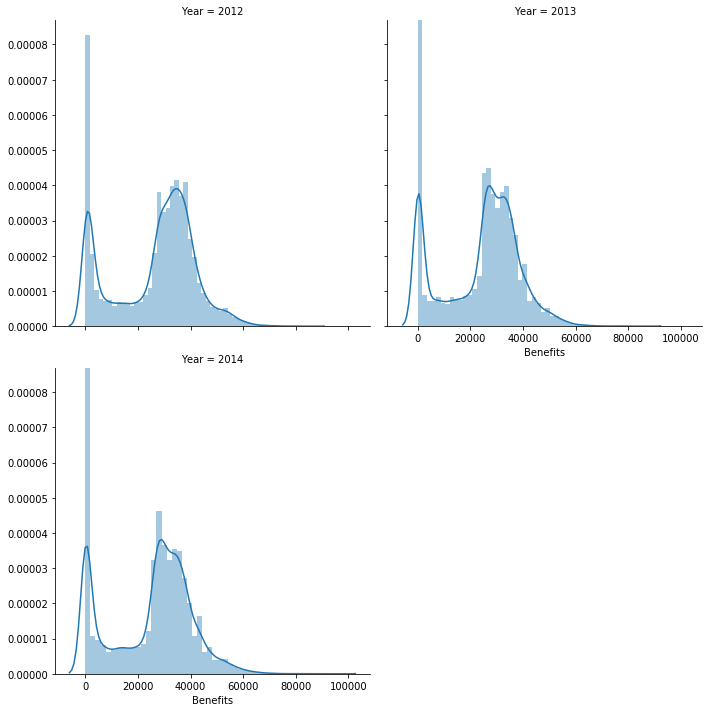

In [51]:
bGrapf = sns.FacetGrid(df_B, col="Year", col_wrap=2, size=5,dropna=True)
bGrapf.map(sns.distplot, 'Benefits',kde=True);

#### Similar distribution just like the one in TotalPayBenefits, TotalPay, so we analysis them further
#### As seen before, only the data collected in 2014 has marked job status as FT ans PT, so there should have  correlation between the data in 2014 with the job status. Therefore, it is necessary to implement further analysis

### Analysis Pay and Benefits based on different job status: FT and PT, in 2014

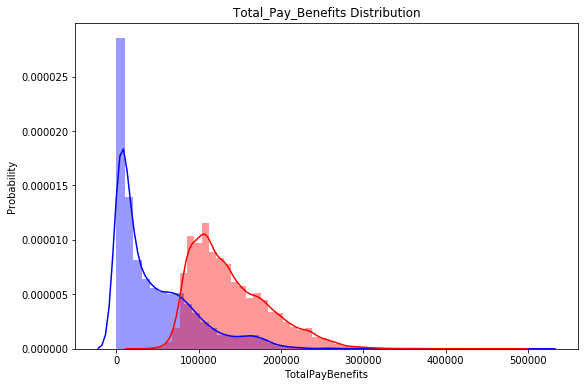

In [52]:
pt_2014 = df[df['Status']=='PT']
ft_2014 = df[df['Status']=='FT']

fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(pt_2014['TotalPayBenefits'].dropna(), label="Part-Time",color='b',ax=ax)
sns.distplot(ft_2014['TotalPayBenefits'].dropna(), label="Full-Time",color='r',ax=ax)

plt.xlabel('TotalPayBenefits')
plt.ylabel('Probability')
title = plt.title('Total_Pay_Benefits Distribution')

#### It is clear that the full-time jobs get more salaries than part-time jobs. And the full-time curve is nearly as the normal distribution, most people get the median salaries, meanwhile most people of part-time jobs get less pay 

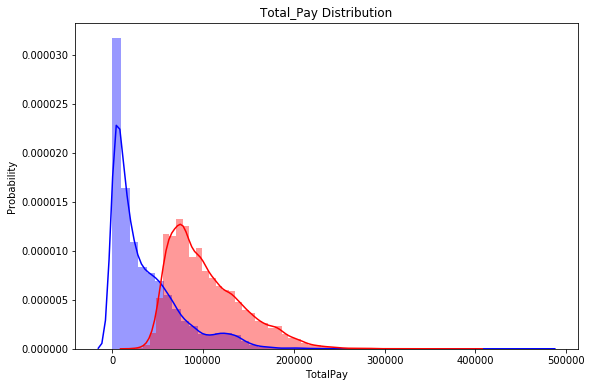

In [53]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(pt_2014['TotalPay'].dropna(), label="Part-Time",color='b',ax=ax)
sns.distplot(ft_2014['TotalPay'].dropna(), label="Full-Time",color='r',ax=ax)

plt.xlabel('TotalPay')
plt.ylabel('Probability')
title = plt.title('Total_Pay Distribution')

#### Quite similar situation as TotalPayBenefits. It is reasonable. Work more, then get more

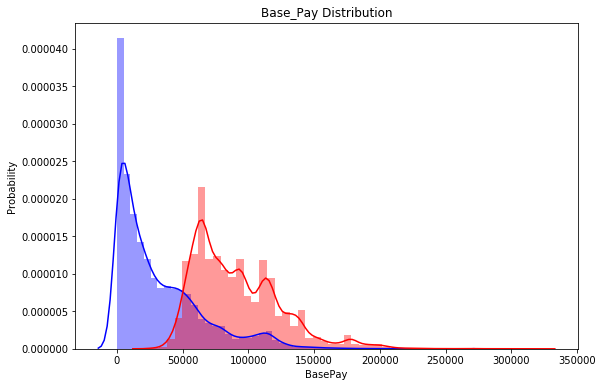

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(pt_2014['BasePay'].dropna(), label="Part-Time",color='b',ax=ax)
sns.distplot(ft_2014['BasePay'].dropna(), label="Full-Time",color='r',ax=ax)

plt.xlabel('BasePay')
plt.ylabel('Probability')
title = plt.title('Base_Pay Distribution')

#### Also similar

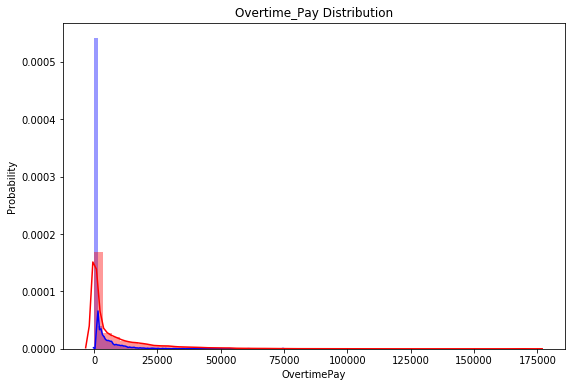

In [55]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(pt_2014['OvertimePay'].dropna(), label="Part-Time",color='b',ax=ax)
sns.distplot(ft_2014['OvertimePay'].dropna(), label="Full-Time",color='r',ax=ax)

plt.xlabel('OvertimePay')
plt.ylabel('Probability')
title = plt.title('Overtime_Pay Distribution')

#### This graph shows most people in either of job status attend less overtime work, but there exists few people over work more and get more pay

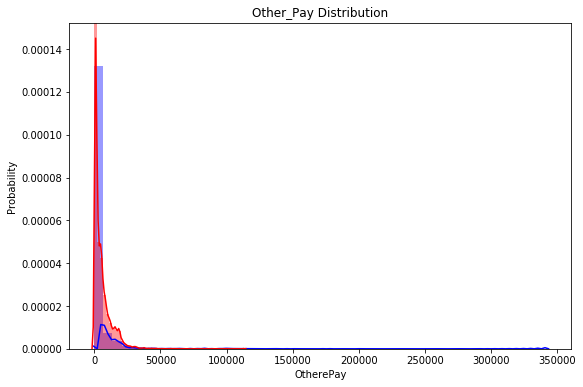

In [56]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(pt_2014['OtherPay'].dropna(), label="Part-Time",color='b',ax=ax)
sns.distplot(ft_2014['OtherPay'].dropna(), label="Full-Time",color='r',ax=ax)

plt.xlabel('OtherePay')
plt.ylabel('Probability')
title = plt.title('Other_Pay Distribution')

#### Similar as former one. Most people attend less on Overtime work

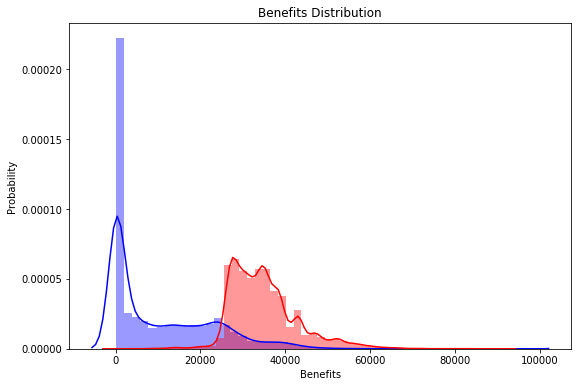

In [57]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(pt_2014['Benefits'].dropna(), label="Part-Time",color='b',ax=ax)
sns.distplot(ft_2014['Benefits'].dropna(), label="Full-Time",color='r',ax=ax)

plt.xlabel('Benefits')
plt.ylabel('Probability')
title = plt.title('Benefits Distribution')

#### Referring to the Benefits, there has a huge gap between full-time job and part-time job. It seems that full-time job is a guarantee to get much more benefits

### From above analysis: It is clear to see that full-time jobs could get more pay and benefits, and it is reasonable in consideration with practical situation

### At Last: Check the correlation between different columns. The value is more close to 1, then there exists more strong correlation between two columns

In [58]:
df.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.206143,-0.080714,-0.099627,0.287173,-0.209242,-0.089637,0.968276
BasePay,-0.206143,1.000000,0.267263,0.280956,0.653733,0.954431,0.946600,0.032750
OvertimePay,-0.080714,0.267263,1.000000,0.316243,0.225571,0.504729,0.467688,0.028417
OtherPay,-0.099627,0.280956,0.316243,1.000000,0.159674,0.470241,0.421906,-0.001989
Benefits,0.287173,0.653733,0.225571,0.159674,1.000000,0.631666,0.781848,0.462850
TotalPay,-0.209242,0.954431,0.504729,0.470241,0.631666,1.000000,0.977205,0.033939
TotalPayBenefits,-0.089637,0.946600,0.467688,0.421906,0.781848,0.977205,1.000000,0.154044
Year,0.968276,0.032750,0.028417,-0.001989,0.462850,0.033939,0.154044,1.000000


#### We plot the corr information to get a better view

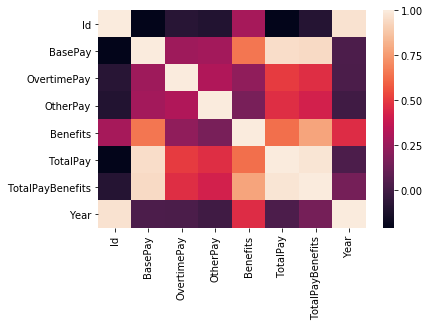

In [59]:
sns.heatmap(df.corr())

### The correlation situation is quite obvious. For example:  there exists  strong correlations between Totalpay and TotalPayBenefits，BasePay and TotalPay...

## Conclusion

### In general:  The labour market and salary situation is consistent during these four years in San Francisco. And also, full-time jobs can gain much more in both pay and benefits, compared with part-time jobs